## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## IMPORTING THE DATASET

In [2]:
df=pd.read_csv("IPL 2008-2017 DataSet.csv")

## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

## DATA VISUALIZATION

## BAR CHART

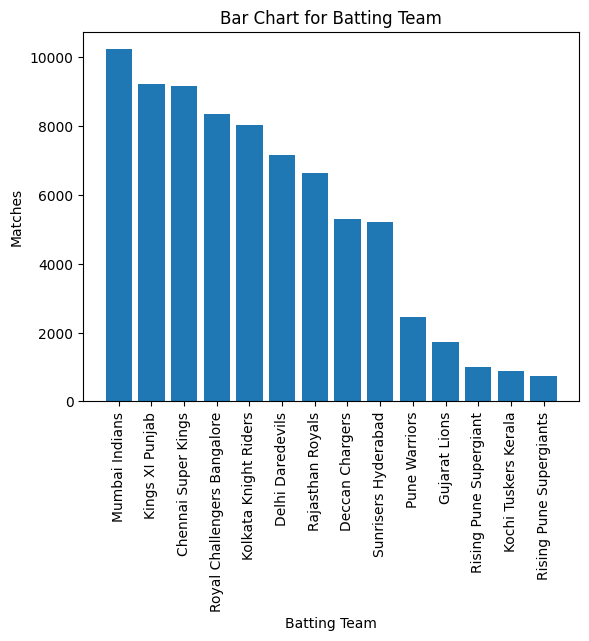

In [7]:
bat_count = df['bat_team'].value_counts()
plt.bar(bat_count.index, bat_count.values)
plt.xlabel('Batting Team')
plt.ylabel('Matches')
plt.title('Bar Chart for Batting Team')
plt.xticks(rotation=90)
plt.show()

## PIE CHART

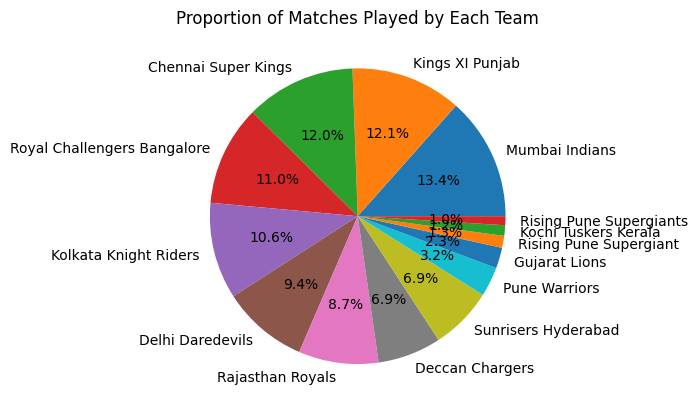

In [8]:
bat_team = df['bat_team'].value_counts()
plt.pie(bat_team.values, labels=bat_team.index, autopct='%1.1f%%')
plt.title('Proportion of Matches Played by Each Team')
plt.show()

## HISTOGRAM

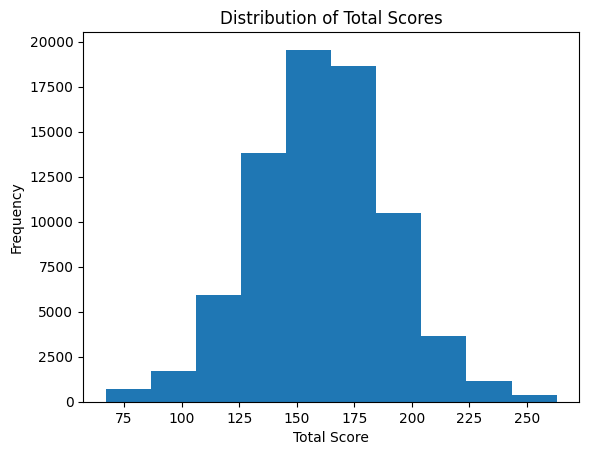

In [9]:
plt.hist(df['total'], bins=10)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores')
plt.show()

## LINE CHART

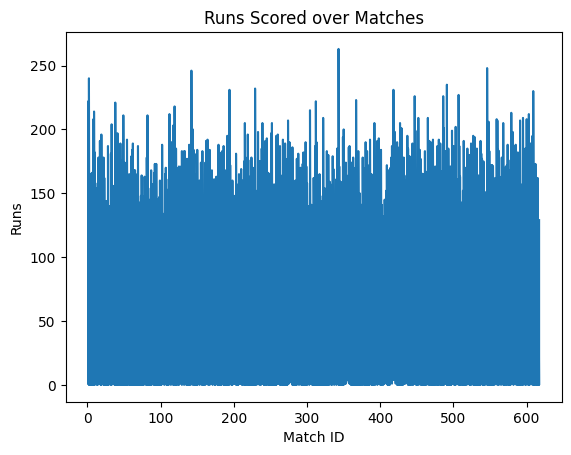

In [10]:
plt.plot(df['mid'], df['runs'])
plt.xlabel('Match ID')
plt.ylabel('Runs')
plt.title('Runs Scored over Matches')
plt.show()

## SCATTERPLOT

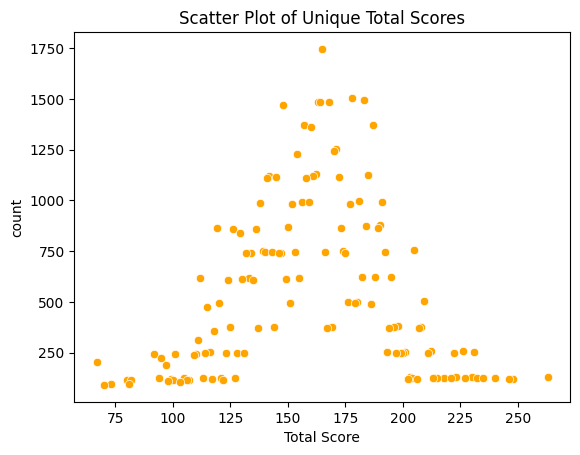

In [11]:
total_counts = df['total'].value_counts().reset_index()
total_counts.columns = ['total', 'count']
sns.scatterplot(data=total_counts, x='total', y='count', color='orange')
plt.xlabel('Total Score')
plt.title('Scatter Plot of Unique Total Scores')
plt.show()

## BOX PLOT

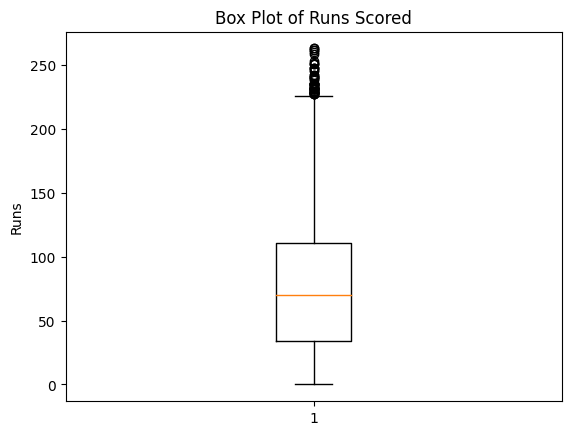

In [12]:
plt.boxplot(df['runs'])
plt.ylabel('Runs')
plt.title('Box Plot of Runs Scored')
plt.show()

## HEAT MAP

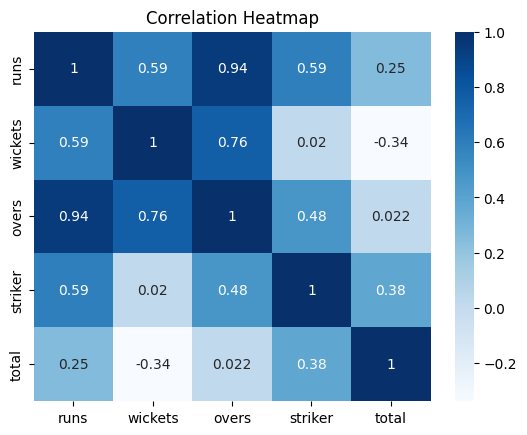

In [13]:
subset_df = df[['runs', 'wickets', 'overs', 'striker', 'total']]
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## DATA CLEANING

In [14]:
irrelevant = ['mid','date','venue','batsman', 'bowler','striker','non-striker']
df = df.drop(irrelevant, axis=1)

In [15]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [16]:
teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals',
         'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore',
         'Delhi Daredevils','Sunrisers Hyderabad']

In [17]:
df = df[(df['bat_team'].isin(teams)) & (df['bowl_team'].isin(teams))]

In [18]:
df = df[df['overs'] >= 5.0]

## ENCODING

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  df[col] = le.fit_transform(df[col])
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [20]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [21]:
df = np.array(columnTransformer.fit_transform(df))

In [22]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df1 = pd.DataFrame(df, columns=cols)

In [23]:
df1.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


In [24]:
features = df1.drop(['total'], axis=1)
labels = df1['total']

## SPLITING DATA FOR TRAIN AND TEST

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {x_train.shape}\nTesting Set : {x_test.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


## BUILDING THE MODELS

In [26]:
models = dict()

## DECISION TREE REGRESSOR

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [28]:
train_dt = str(tree.score(x_train, y_train) * 100)
test_dt = str(tree.score(x_test, y_test) * 100)
print(f'Train Score : {train_dt[:5]}%\nTest Score : {test_dt[:5]}%')
models["tree"] = test_dt

Train Score : 99.98%
Test Score : 86.23%


## LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(x_train, y_train)

LinearRegression()

In [30]:
train_lr = str(linreg.score(x_train, y_train) * 100)
test_lr = str(linreg.score(x_test, y_test) * 100)
print(f'Train Score : {train_lr[:5]}%\nTest Score : {test_lr[:5]}%')
models["linreg"] = test_lr

Train Score : 65.86%
Test Score : 66.13%


## RANDOM FOREST REGRESSOR

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
train_rf = str(forest.score(x_train, y_train)*100)
test_rf = str(forest.score(x_test, y_test)*100)
print(f'Train Score : {train_rf[:5]}%\nTest Score : {test_rf[:5]}%')
models["forest"] = test_rf

Train Score : 99.03%
Test Score : 93.39%


## ACCURACY

## ACCURACY OF DECISION TREE REGRESSOR

In [33]:
from sklearn.metrics import accuracy_score
test_dt = models["tree"]
accuracy_dt = float(test_dt[:5])
print(f"Accuracy for Decision Tree model: {accuracy_dt}%")

Accuracy for Decision Tree model: 86.23%


## ACCURACY OF LINEAR REGRESSION

In [34]:
from sklearn.metrics import accuracy_score
test_lr = models["linreg"]
accuracy_lr = float(test_lr[:5])
print(f"Accuracy for Linear regression model: {accuracy_lr}%")

Accuracy for Linear regression model: 66.13%


## ACCURACY OF RANDOM FOREST REGRESSION

In [35]:
from sklearn.metrics import accuracy_score
test_rf = models["forest"]
accuracy_rf = float(test_rf[:5])
print(f"Accuracy for Random forest model: {accuracy_rf}%")

Accuracy for Random forest model: 93.39%


## VISUALIZING THE ACCURACIES

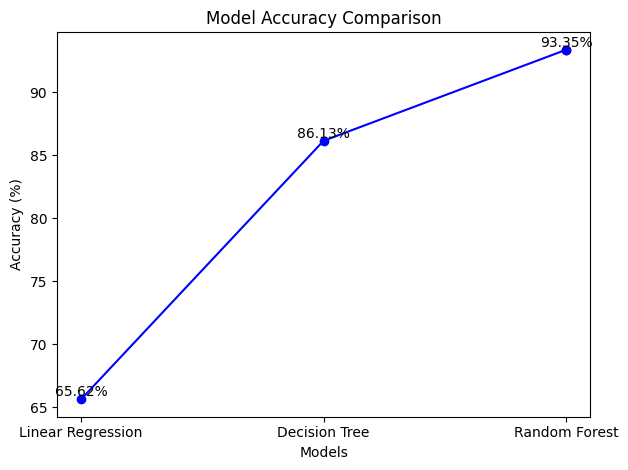

In [36]:
models = ["Linear Regression", "Decision Tree", "Random Forest"]
accuracies = [65.62, 86.13, 93.35]
highest_accuracy_index = accuracies.index(max(accuracies))
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')
plt.scatter(models[highest_accuracy_index], accuracies[highest_accuracy_index], color='red')
for i in range(len(models)):
    plt.text(models[i], accuracies[i], f"{accuracies[i]}%", ha='center', va='bottom')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
plt.show()

## PREDICTION

In [37]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

## PREDICTION 1

In [38]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score}')

Predicted Score : 148


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## PREDICTION 2

In [39]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score}')

Predicted Score : 174


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## PREDICTION 3

In [40]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score}')

Predicted Score : 148


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
